Низкое качество моделей, по моему мнению связано с ошибками в парсинге, с чем я буду бороться в дальнейшем. К сожалению, не могу сейчас уделить этому больше внимания в связи с дедлайном проекта

In [255]:
import requests
from bs4 import BeautifulSoup
import csv
import time
import json
import re
import pandas as pd
from joblib import Parallel, delayed
import re
import sys
import numpy as np
import pandas as pd
import pandas.api.types as at
from tqdm import tqdm
from datetime import timedelta, datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [256]:
df_1 = pd.read_csv('Final_df.csv')
df_1_1 = pd.read_csv('Final_df_continue.csv')
df_2 = pd.read_csv('Final_df_2.csv')
df_3 = pd.read_csv('Final_df_3.csv')
df_4 = pd.read_csv('Final_df_4.csv')
df_4_1 = pd.read_csv('Final_df_4_c.csv')
df_4_2 = pd.read_csv('Final_df_4_c_c.csv')
df_4_3 = pd.read_csv('Final_df_4_c_v.csv')
df_5 = pd.read_csv('Final_df_5.csv')
df_6 = pd.read_csv('Final_df_6.csv')
df_7 = pd.read_csv('Final_df_7.csv')
df_7_1 = pd.read_csv('Final_df_7_1.csv')
df_8 = pd.read_csv('Final_df_8.csv')
df_9 = pd.read_csv('Final_df_9.csv')
df_10 = pd.read_csv('Final_df_10.csv')

In [257]:
final_df = pd.concat([df_1,df_1_1], sort = False, axis = 0)
final_df = pd.concat([final_df,df_2], sort = False, axis = 0)
final_df = pd.concat([final_df,df_3], sort = False, axis = 0)
final_df = pd.concat([final_df,df_4], sort = False, axis = 0)
final_df = pd.concat([final_df,df_4_1], sort = False, axis = 0)
final_df = pd.concat([final_df,df_4_2], sort = False, axis = 0)
final_df = pd.concat([final_df,df_4_3], sort = False, axis = 0)
final_df = pd.concat([final_df,df_5], sort = False, axis = 0)
final_df = pd.concat([final_df,df_6], sort = False, axis = 0)
final_df = pd.concat([final_df,df_7], sort = False, axis = 0)
final_df = pd.concat([final_df,df_7_1], sort = False, axis = 0)
final_df = pd.concat([final_df,df_8], sort = False, axis = 0)
final_df = pd.concat([final_df,df_9], sort = False, axis = 0)
final_df = pd.concat([final_df,df_10], sort = False, axis = 0)

В процессе парсинга уже были удалены удаленные объявления, поэтому сейчас не надо их удалять

In [258]:
final_df

,Unnamed: 0,car_url,bodyType,brand,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_name,name,numberOfDoors,parsing_unixtime,price,priceCurrency,productionDate,sell_id,views,date_added,super_gen,vehicleConfiguration,vehicleTransmission,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня,region
0,https://auto.ru/cars/used/sale/mercedes/viano/...,https://auto.ru/cars/used/sale/mercedes/viano/...,минивэн,MERCEDES,чёрный,[],В нашем автосалоне Вы можете автомобиль купить...,2.1 LTR,163 N12,"{'cruise-control': True, 'asr': True, 'tinted-...",дизель,https://autoru.naydex.net/Qm17tv105/bdf4759E5M...,132 000 км,2010,Viano,Mercedes-Benz Viano L2 I (W639) Рестайлинг,4,1633028022,2310000.0,RUB,2013,1105117069,462.0,28 сентября,"{'sale-data-attributes': {'asciiCat': 'cars', ...",MINIVAN MECHANICAL 2.1,механическая,3 или более,NaN,Оригинал,задний,Левый,Не требует ремонта,Растаможен,в Москве
1,https://auto.ru/cars/used/sale/land_rover/disc...,https://auto.ru/cars/used/sale/land_rover/disc...,внедорожник 5 дв.,LAND_ROVER,серый,[],Легендарный внедорожник от британской компании...,2.5 LTR,138 N12,{},дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,466 000 км,1998,Discovery,Land Rover Discovery II,5,1633028024,500000.0,RUB,2001,1105409986,1052.0,26 сентября,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS AUTOMATIC 2.5,автоматическая,2 владельца,NaN,Оригинал,полный,Левый,Не требует ремонта,Растаможен,в Измайлово
2,https://auto.ru/cars/new/group/land_rover/rang...,https://auto.ru/cars/new/group/land_rover/rang...,внедорожник 5 дв.,LAND_ROVER,чёрный,[],РОЛЬФ Октябрьская Jaguar Land Rover предлагает...,3.0 LTR,380 N12,"{'cruise-control': True, 'tinted-glass': True,...",бензин,https://autoru.naydex.net/Qm17tv105/bdf4759E5M...,NaN,2017,NaN,Land Rover Range Rover IV Рестайлинг,5,1633028025,12760000.0,RUB,2021,1105098754,NaN,NaN,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS AUTOMATIC 3.0,автоматическая,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://auto.ru/cars/new/group/bmw/x5/21718431...,https://auto.ru/cars/new/group/bmw/x5/21718431...,внедорожник 5 дв.,BMW,чёрный,[],УСПЕЙТЕ ДО ПОВЫШЕНИЯ ЦЕН ПОКА ДРУГИЕ ДИКТУЮТ У...,2.0 LTR,231 N12,"{'asr': True, 'tinted-glass': True, 'esp': Tru...",дизель,https://avatars.mds.yandex.net/get-autoru-vos/...,NaN,2018,NaN,BMW X5 25d IV (G05),5,1633058109,8890000.0,RUB,2021,1105436641,NaN,NaN,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS AUTOMATIC 2.0,автоматическая,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://auto.ru/cars/used/sale/mazda/cx_5/1105...,https://auto.ru/cars/used/sale/mazda/cx_5/1105...,внедорожник 5 дв.,MAZDA,серый,"['multi-wheel', 'airbag-passenger', 'bas', 'lo...",Если Вы хотите приобрести автомобиль с пробег...,2.0 LTR,150 N12,"{'cruise-control': True, 'asr': True, 'tinted-...",бензин,https://autoru.naydex.net/T171DRu50/b651fb4jRP...,53 000 км,2017,CX-5,Mazda CX-5 II,5,1633058228,2620000.0,RUB,2019,1105206979,90.0,29 сентября,"{'sale-data-attributes': {'asciiCat': 'cars', ...",ALLROAD_5_DOORS MECHANICAL 2.0,механическая,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Химках
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,https://auto.ru/cars/used/sale/daewoo/matiz/11...,https://auto.ru/cars/used/sale/daewoo/matiz/11...,хэтчбек 5 дв.,DAEWOO,чёрный,"['seat-transformation', 'fabric-seats', 'steel...",Состояние отлично весь ходовой поменяли глушит...,0.8 LTR,52 N12,"{'tinted-glass': True, 'abs': True, 'ptf': Tru...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,150 000 км,2000,Matiz,Daewoo Matiz I Рестайлинг,5,1633152004,150000.0,RUB,2013,1105172797,1408.0,26 сентября,"{'sale-data-attributes': {'asciiCat': 'cars', ...",HATCHBACK_5_DOORS MECHANICAL 0.8,механическая,2 владельца,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен,в Москве

По какой-то причине пропарсились лишь 4763 страницы из 269000. К сожалению, не могу больше задерживать сдачу проекта, поэтому придется работать с ними

In [259]:
test_df = pd.read_csv('test.csv')

In [260]:
test_df

,bodyType,brand,car_url,color,complectation_dict,description,engineDisplacement,enginePower,equipment_dict,fuelType,image,mileage,modelDate,model_info,model_name,name,numberOfDoors,parsing_unixtime,priceCurrency,productionDate,sell_id,super_gen,vehicleConfiguration,vehicleTransmission,vendor,Владельцы,Владение,ПТС,Привод,Руль,Состояние,Таможня
0,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,синий,NaN,"Все автомобили, представленные в продаже, прох...",1.2 LTR,105 N12,"{""engine-proof"":true,""tinted-glass"":true,""airb...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,74000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.2 AMT (105 л.с.),5,1603226273,RUB,2014,1100575026,"{""id"":""10373605"",""displacement"":1197,""engine_t...",LIFTBACK ROBOT 1.2,роботизированная,EUROPEAN,3 или более,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
1,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,чёрный,NaN,ЛОТ: 01217195\nАвтопрага Север\nДанный автомоб...,1.6 LTR,110 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,60563,2017,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 MT (110 л.с.),5,1603226277,RUB,2017,1100549428,"{""id"":""20913311"",""displacement"":1598,""engine_t...",LIFTBACK MECHANICAL 1.6,механическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
2,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/superb/11...,серый,"{""id"":""20026336"",""name"":""Ambition"",""available_...","Все автомобили, представленные в продаже, прох...",1.8 LTR,152 N12,"{""cruise-control"":true,""tinted-glass"":true,""es...",бензин,https://avatars.mds.yandex.net/get-autoru-vos/...,88000,2013,"{""code"":""SUPERB"",""name"":""Superb"",""ru_name"":""Су...",SUPERB,DSG 1.8 AMT (152 л.с.),5,1603226280,RUB,2014,1100658222,"{""id"":""20026323"",""nameplate"":""DSG"",""displaceme...",LIFTBACK ROBOT 1.8,роботизированная,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
3,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,коричневый,"{""id"":""20803582"",""name"":""Ambition"",""available_...",КОМПЛЕКТ ЗИМНЕЙ (ЛЕТНЕЙ) РЕЗИНЫ ПО СЕЗОНУ В ПО...,1.6 LTR,110 N12,"{""cruise-control"":true,""roller-blind-for-rear-...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,95000,2013,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.6 AT (110 л.с.),5,1603226284,RUB,2014,1100937408,"{""id"":""20105521"",""displacement"":1598,""engine_t...",LIFTBACK AUTOMATIC 1.6,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
4,лифтбек,SKODA,https://auto.ru/cars/used/sale/skoda/octavia/1...,белый,NaN,ЛОТ: 01220889\nАвтопрага Север\n\nВы можете по...,1.8 LTR,152 N12,"{""cruise-control"":true,""asr"":true,""esp"":true,""...",бензин,https://autoru.naydex.net/o9DBXQ270/5ac010hAY0...,58536,2008,"{""code"":""OCTAVIA"",""name"":""Octavia"",""ru_name"":""...",OCTAVIA,1.8 AT (152 л.с.),5,1603226288,RUB,2012,1101037972,"{""id"":""4561004"",""displacement"":1798,""engine_ty...",LIFTBACK AUTOMATIC 1.8,автоматическая,EUROPEAN,1 владелец,NaN,Оригинал,передний,Левый,Не требует ремонта,Растаможен
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,седан,BMW,https://auto.ru/cars/used/sale/bmw/3er/1101369...,коричневый,NaN,Продается BMW 316i в отличном состоянии. Прода...,1.6 LTR,136 N12,"{""cruise-control"":true,""asr"":true,""tinted-glas...",бензин,https://autoru.naydex.net/nwI1K7152/b604fdsYg7...,115000,2011,"{""code"":""3ER"",""name"":""3 серии"",""ru_name"":""3 се...",3ER,316i 1.6 AT (136 л.с.),4,1603707643,RUB,2014,1101369263,"{""id"":""8546464"",""name"":""316"",""nameplate"":""316i...",SEDAN AUTOMATIC 1.6,автоматическая,EUROPEAN,3 или более,2 года и 1 месяц,Оригинал,задний,Левый,Не требует ремонта,

In [261]:
test_df.columns

Index(['bodyType', 'brand', 'car_url', 'color', 'complectation_dict',
       'description', 'engineDisplacement', 'enginePower', 'equipment_dict',
       'fuelType', 'image', 'mileage', 'modelDate', 'model_info', 'model_name',
       'name', 'numberOfDoors', 'parsing_unixtime', 'priceCurrency',
       'productionDate', 'sell_id', 'super_gen', 'vehicleConfiguration',
       'vehicleTransmission', 'vendor', 'Владельцы', 'Владение', 'ПТС',
       'Привод', 'Руль', 'Состояние', 'Таможня'],
      dtype='object')

In [262]:
final_df.columns

Index(['Unnamed: 0', 'car_url', 'bodyType', 'brand', 'color',
       'complectation_dict', 'description', 'engineDisplacement',
       'enginePower', 'equipment_dict', 'fuelType', 'image', 'mileage',
       'modelDate', 'model_name', 'name', 'numberOfDoors', 'parsing_unixtime',
       'price', 'priceCurrency', 'productionDate', 'sell_id', 'views',
       'date_added', 'super_gen', 'vehicleConfiguration',
       'vehicleTransmission', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль',
       'Состояние', 'Таможня', 'region'],
      dtype='object')

Не нужны:
Первая колонка, вторая - ссылка не несет смысла
complementation dict и description, image, equipment_dict  невозможно обработать пройденными методами - поэтому отбросим эти колонки


In [263]:
final_df.drop(['Unnamed: 0','car_url','complectation_dict','description','image','equipment_dict','views','date_added'], axis = 1, inplace = True)

In [264]:
test_df.drop(['car_url','complectation_dict','description','image','equipment_dict','model_info'], axis = 1, inplace = True)

In [265]:
final_df.columns

Index(['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower',
       'fuelType', 'mileage', 'modelDate', 'model_name', 'name',
       'numberOfDoors', 'parsing_unixtime', 'price', 'priceCurrency',
       'productionDate', 'sell_id', 'super_gen', 'vehicleConfiguration',
       'vehicleTransmission', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль',
       'Состояние', 'Таможня', 'region'],
      dtype='object')

In [266]:
test_df.columns

Index(['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower',
       'fuelType', 'mileage', 'modelDate', 'model_name', 'name',
       'numberOfDoors', 'parsing_unixtime', 'priceCurrency', 'productionDate',
       'sell_id', 'super_gen', 'vehicleConfiguration', 'vehicleTransmission',
       'vendor', 'Владельцы', 'Владение', 'ПТС', 'Привод', 'Руль', 'Состояние',
       'Таможня'],
      dtype='object')

In [267]:
test_df['bodyType'] = [str(x).lower().replace('.', '') for x in test_df['bodyType']]
final_df['bodyType'] = [str(x).lower() for x in final_df['bodyType']]

Уберем LTR из колонки engineDisplacement

In [268]:
test_df['engineDisplacement'] = test_df['engineDisplacement'].apply(lambda x: str(x).replace('LTR', ''))
final_df['engineDisplacement'] = final_df['engineDisplacement'].apply(lambda x: str(x).replace('LTR', ''))

С помощью регулярных выражений достанем цифры из enginePower

In [269]:
pattern = re.compile('^(\d+)\.*')
test_df['enginePower'] = test_df['enginePower'].apply(lambda x: int(str(pattern.findall(x))[2:-2]))
final_df['enginePower'] = final_df['enginePower'].apply(lambda x: int(str(pattern.findall(x))[2:-2]))

Заполним пропуски нулями

In [270]:
final_df['numberOfDoors'] = final_df['numberOfDoors'].fillna(0).astype('int')

In [271]:
final_df['priceCurrency']

0      RUB
1      RUB
2      RUB
3      RUB
4      RUB
      ... 
256    RUB
257    RUB
258    RUB
259    RUB
260    RUB
Name: priceCurrency, Length: 4763, dtype: object

Обработаем значения Таможни

In [272]:
final_df.describe

<bound method NDFrame.describe of               bodyType       brand    color engineDisplacement  enginePower  \
0              минивэн    MERCEDES   чёрный               2.1           163   
1    внедорожник 5 дв.  LAND_ROVER    серый               2.5           138   
2    внедорожник 5 дв.  LAND_ROVER   чёрный               3.0           380   
3    внедорожник 5 дв.         BMW   чёрный               2.0           231   
4    внедорожник 5 дв.       MAZDA    серый               2.0           150   
..                 ...         ...      ...                ...          ...   
256      хэтчбек 5 дв.      DAEWOO   чёрный               0.8            52   
257  внедорожник 5 дв.      NISSAN  красный               1.5           110   
258      хэтчбек 5 дв.      DAEWOO   чёрный               0.8            52   
259  внедорожник 5 дв.        FORD   чёрный               3.5           249   
260  внедорожник 5 дв.  LAND_ROVER   чёрный               3.0           380   

    fuelType     

In [273]:
final_df['Таможня'] = final_df['Таможня'].apply(lambda x: True if x == 'Растаможен' else False)
test_df['Таможня'] = test_df['Таможня'].apply(lambda x: True if x == 'Растаможен' else False)

In [274]:
final_df['Таможня'].value_counts()

True     3497
False    1266
Name: Таможня, dtype: int64

In [275]:
test_df['Таможня'].value_counts()

True    34686
Name: Таможня, dtype: int64

Обработаем количество владельцев

In [276]:
final_df['Владельцы'] = final_df['Владельцы'].apply(lambda x: 1.0 if x == '1 владелец' else x)
final_df['Владельцы'] = final_df['Владельцы'].apply(lambda x: 2.0 if x == '2 владельца' else x)
final_df['Владельцы'] = final_df['Владельцы'].apply(lambda x: 3.0 if x == '3 или более' else x)
test_df['Владельцы'] = test_df['Владельцы'].apply(lambda x: 1.0 if x == '1 владелец' else x)
test_df['Владельцы'] = test_df['Владельцы'].apply(lambda x: 2.0 if x == '2 владельца' else x)
test_df['Владельцы'] = test_df['Владельцы'].apply(lambda x: 3.0 if x == '3 или более' else x)

В продолжительности владения очень много пропусков, поэтому просто удалим этот столбец

In [277]:
final_df.drop('Владение', axis = 1, inplace = True)
test_df.drop('Владение', axis = 1, inplace = True)

In [278]:
final_df.dropna(subset=['price'], inplace=True)

Для конкретной обработки категориальных переменных определим два датасета в один

In [279]:
final_df['sample'] = 1
test_df['sample'] = 0

data = test_df.append(final_df, sort=False).reset_index(drop=True)

In [280]:
data['mileage']

0             74000
1             60563
2             88000
3             95000
4             58536
            ...    
38729     40 000 км
38730    150 000 км
38731    144 000 км
38732    177 000 км
38733           NaN
Name: mileage, Length: 38734, dtype: object

In [281]:
final_df.dtypes

bodyType                 object
brand                    object
color                    object
engineDisplacement       object
enginePower               int64
fuelType                 object
mileage                  object
modelDate                 int64
model_name               object
name                     object
numberOfDoors             int32
parsing_unixtime          int64
price                   float64
priceCurrency            object
productionDate            int64
sell_id                   int64
super_gen                object
vehicleConfiguration     object
vehicleTransmission      object
Владельцы               float64
ПТС                      object
Привод                   object
Руль                     object
Состояние                object
Таможня                    bool
region                   object
sample                    int64
dtype: object

In [282]:
data.drop(['name','super_gen','vehicleConfiguration','priceCurrency','region','vendor'], axis = 1, inplace = True)

In [285]:
data['mileage']=data['mileage'].apply(lambda x: str(x).replace(' ',''))
#pattern = re.compile('/^\d+$/')
#data['mileage']=data['mileage'].apply(lambda x: str(pattern.findall(str(x))))
data['mileage']=data['mileage'].apply(lambda x: 0 if str(x) == 'nan' or str(x)=='NaN' else x)

In [286]:
data['mileage']=data['mileage'].apply(lambda x:float(x[:-2]) if x[-2:] == 'км' else float(x))

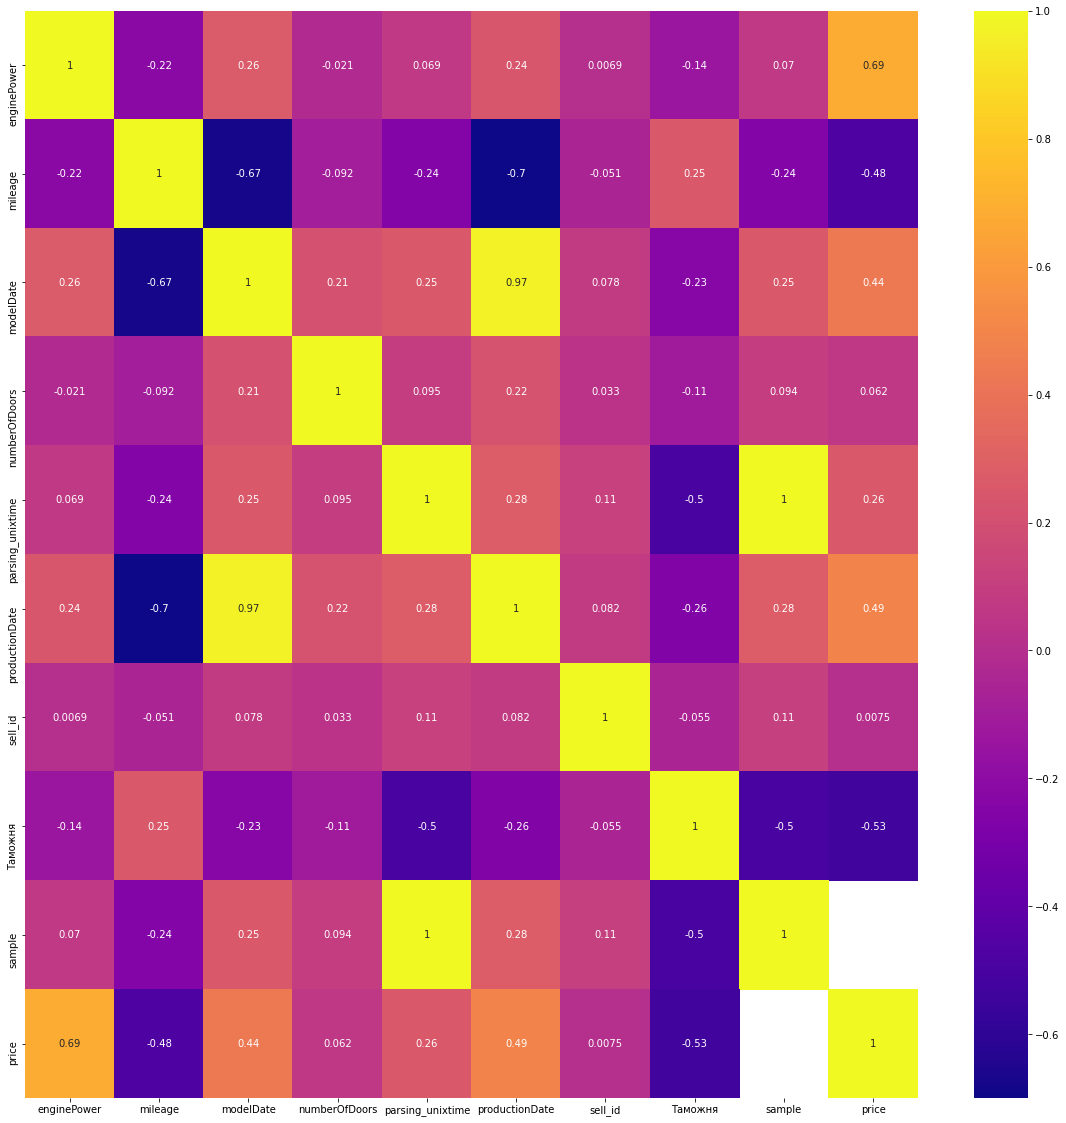

In [287]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True, cmap='plasma')

Нормализируем столбцы

In [288]:
cat_col = ['brand', 'color', 'fuelType', 'model_name', 'vehicleTransmission', 'Владельцы', 'ПТС', 'Привод', 'Руль', 'bodyType','Состояние','engineDisplacement']
bin_col = ['sample']
num_col = ['enginePower', 'mileage', 'modelDate', 'numberOfDoors', 'productionDate']

In [289]:
for column in cat_col:
    data[column] = data[column].astype('category').cat.codes
display(data.head(1))

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,parsing_unixtime,productionDate,sell_id,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,Таможня,sample,price
0,10,49,13,6,105,0,74000.0,2013,563,5,1603226273,2014,1100575026,3,2,1,1,0,0,True,0,NaN


In [291]:
scaler = MinMaxScaler()
data[cat_col] = scaler.fit_transform(data[cat_col])

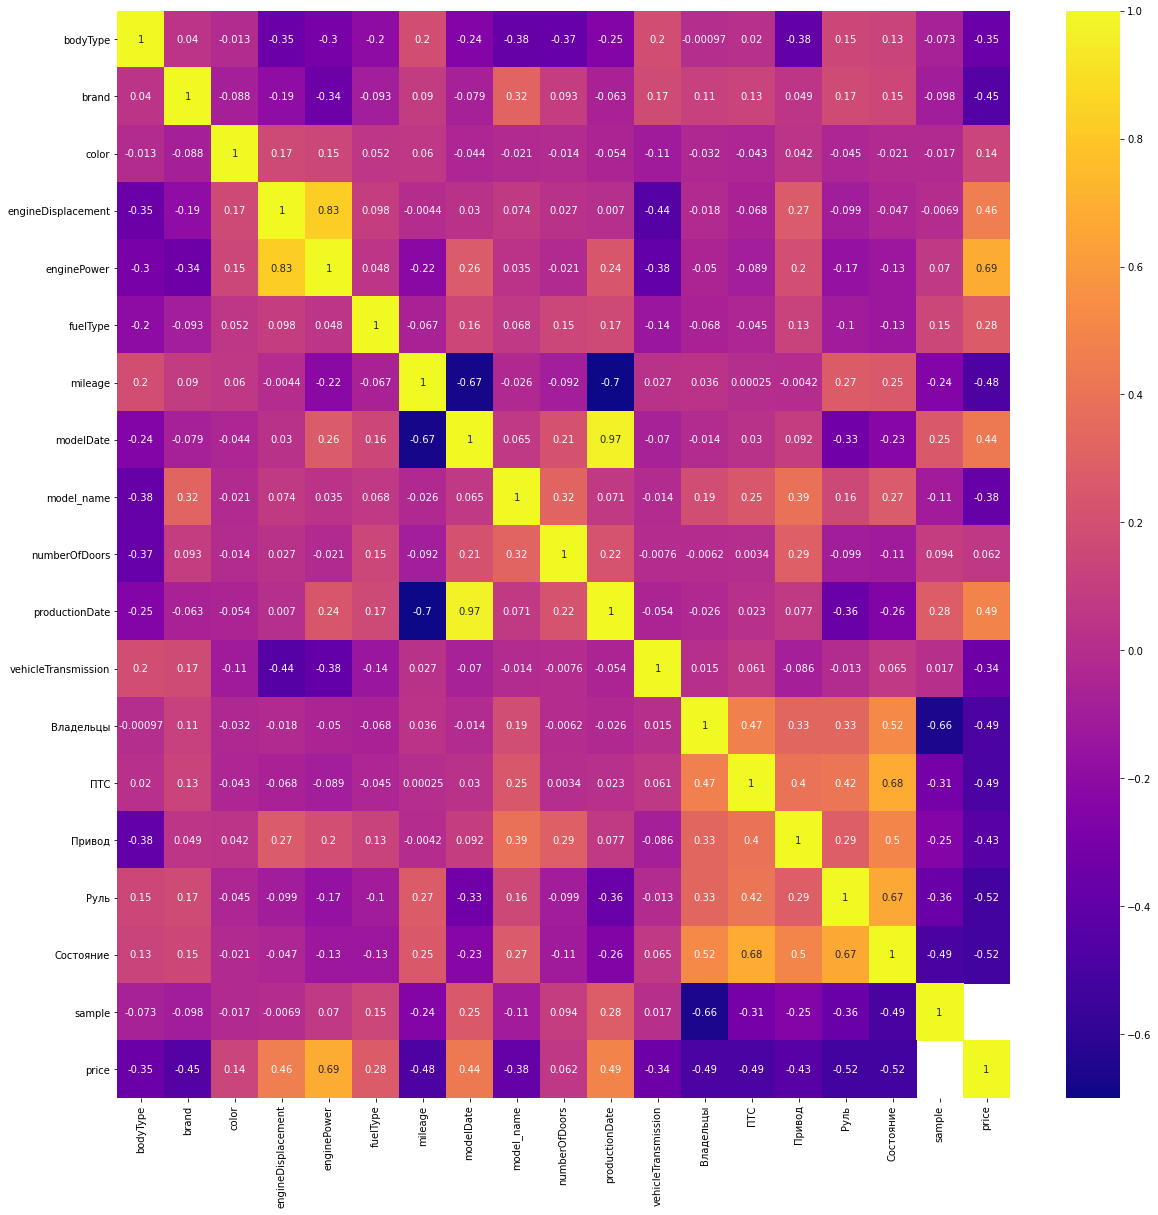

In [296]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(data.corr(), annot=True, cmap='plasma')

In [297]:
data.dtypes

bodyType               float64
brand                  float64
color                  float64
engineDisplacement     float64
enginePower              int64
fuelType               float64
mileage                float64
modelDate                int64
model_name             float64
numberOfDoors            int64
productionDate           int64
vehicleTransmission    float64
Владельцы              float64
ПТС                    float64
Привод                 float64
Руль                   float64
Состояние              float64
sample                   int64
price                  float64
dtype: object

In [298]:
data.isna().sum(axis = 0)

bodyType                   0
brand                      0
color                      0
engineDisplacement         0
enginePower                0
fuelType                   0
mileage                    0
modelDate                  0
model_name                 0
numberOfDoors              0
productionDate             0
vehicleTransmission        0
Владельцы                  0
ПТС                        0
Привод                     0
Руль                       0
Состояние                  0
sample                     0
price                  34686
dtype: int64

Уберем столбцы с большой корреляцией

In [299]:
data.drop(['parsing_unixtime','sell_id','Таможня'], axis = 1, inplace = True)

KeyError: "['parsing_unixtime' 'sell_id' 'Таможня'] not found in axis"

In [300]:
for column in data.columns:
    data[column] = data[column].fillna(0)

Разделим датасет

In [301]:
data.columns

Index(['bodyType', 'brand', 'color', 'engineDisplacement', 'enginePower',
       'fuelType', 'mileage', 'modelDate', 'model_name', 'numberOfDoors',
       'productionDate', 'vehicleTransmission', 'Владельцы', 'ПТС', 'Привод',
       'Руль', 'Состояние', 'sample', 'price'],
      dtype='object')

In [302]:
X = data.query('sample == 1').drop(['sample', 'price'], axis=1)
y = data.query('sample == 1')['price'] 

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [304]:
y

34686     2310000.0
34687      500000.0
34688    12760000.0
34689     8890000.0
34690     2620000.0
            ...    
38729     2060000.0
38730      150000.0
38731      970000.0
38732     1800000.0
38733    12760000.0
Name: price, Length: 4048, dtype: float64

In [305]:
pd.set_option('display.max_columns', None)
display(data.sample(3).head(1))
display(data.describe())

,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,sample,price
35706,0.607143,0.032258,1.0,0.245614,190,0.75,0.0,2018,0.0,4,2021,0.666667,0.0,0.0,0.0,0.0,0.0,1,4290000.0


,bodyType,brand,color,engineDisplacement,enginePower,fuelType,mileage,modelDate,model_name,numberOfDoors,productionDate,vehicleTransmission,Владельцы,ПТС,Привод,Руль,Состояние,sample,price
count,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,3.873400e+04,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,38734.000000,3.873400e+04
mean,0.401658,0.558081,0.651311,0.315515,190.422136,0.144982,1.535406e+05,2007.728972,0.487544,4.473253,2009.955956,0.291045,0.709619,0.910260,0.749557,0.504725,0.972324,0.104508,3.442361e+05
std,0.291887,0.331021,0.360647,0.167760,92.848104,0.294973,1.024558e+05,7.550740,0.304182,0.697869,7.194864,0.364877,0.229212,0.224926,0.253733,0.126889,0.164045,0.305922,1.581679e+06
min,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000e+00,1904.000000,0.000000,0.000000,1904.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.071429,0.354839,0.333333,0.210526,125.000000,0.000000,8.149250e+04,2004.000000,0.182309,4.000000,2007.000000,0.000000,0.600000,1.000000,0.666667,0.500000,1.000000,0.000000,0.000000e+00
50%,0.428571,0.629032,0.800000,0.245614,169.000000,0.000000,1.410000e+05,2009.000000,0.510248,5.000000,2011.000000,0.000000,0.600000,1.000000,0.666667,0.500000,1.000000,0.000000,0.000000e+00
75%,0.607143,0.887097,1.000000,0.421053,235.000000,0.000000,2.070000e+05,2013.000000,0.715210,5.000000,2015.000000,0.666667,0.800000,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000e+00
max,1.000000,1.000000,1.000000,1.000000,820.000000,1.000000,1.060000e+06,2021.000000,1.000000,5.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.391000e+07


# Построим наивную модель

In [125]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [126]:
tmp_train = X_train.copy()
tmp_train['price'] = y_train

In [127]:
predict = X_test['engineDisplacement'].map(tmp_train.groupby('engineDisplacement')['price'].median())

#оцениваем точность
print(f"Точность наивной модели по метрике MAPE: {(mape(y_test, predict.values))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 87.82%


# Случайный лес

In [146]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num = 6)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rfr = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   56.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

In [147]:
best_rfr = RandomForestRegressor(random_state=42
                      , n_estimators=300
                      , min_samples_split=2
                      , min_samples_leaf=1
                      , max_features='sqrt'
                      , max_depth=11
                      , bootstrap=False)

best_rfr.fit(X_train, y_train)


predict_rfr = best_rfr.predict(X_test)
print_learn_report(y_test, predict_rfr)

Точность по метрике MAPE:18.96%


Прологарифмируем переменную

In [306]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num = 5)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
rfr = RandomForestRegressor(random_state = 42)
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=42, n_jobs = -1)
rf_random.fit(X_train, np.log(y_train))
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   43.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [307]:
best_rfr = RandomForestRegressor(random_state=42
                      , n_estimators=500
                      , min_samples_split=2
                      , min_samples_leaf=1
                      , max_features='sqrt'
                      , max_depth=None
                      , bootstrap=False)

best_rfr.fit(X_train, np.log(y_train))


predict_rfr = np.exp(best_rfr.predict(X_test))
print_learn_report(y_test, predict_rfr)

Точность по метрике MAPE:13.52%


# XGB

In [216]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate=0.01, max_depth=15, alpha=1,
                          n_estimators=1000)
xgb_reg.fit(X_train, y_train)
xgb_red_pred = xgb_reg.predict(X_test)

In [168]:
def print_learn_report(y_test, y_pred):
    print(f"Точность по метрике MAPE:{(mape(y_test, y_pred))*100:0.2f}%")

In [169]:
print_learn_report(y_test, xgb_red_pred)

Точность по метрике MAPE:14.60%


Попробуем проогарифмировать переменную

In [311]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate=0.05, max_depth=15, alpha=1,
                          n_estimators=1000)
xgb_reg.fit(X_train, np.log(y_train))
xgb_red_pred = np.exp(xgb_reg.predict(X_test))

In [312]:
print_learn_report(y_test, xgb_red_pred)

Точность по метрике MAPE:13.58%


# GradientBoosting

In [238]:
RANDOM_SEED = 42

In [239]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num = 10)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=RANDOM_SEED, n_jobs = -1)
gbr_random.fit(X_train, y_train)
gbr_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   50.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

{'n_estimators': 366,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 8}

In [310]:
best_gbr = GradientBoostingRegressor(random_state=RANDOM_SEED
                      , n_estimators=366
                      , min_samples_split=10
                      , min_samples_leaf=1
                      , max_features='sqrt'
                      , max_depth=8)
best_gbr.fit(X_train, y_train)

predict_gbr = best_gbr.predict(X_test)
print_learn_report(y_test, predict_gbr)

Точность по метрике MAPE:14.32%


Прологарифмируем переменную

In [241]:
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [int(x) for x in np.linspace(5, 15, num = 10)] + [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

gbr = GradientBoostingRegressor()
gbr_random = RandomizedSearchCV(estimator = gbr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=10, random_state=RANDOM_SEED, n_jobs = -1)
gbr_random.fit(X_train, np.log(y_train))
gbr_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  2

{'n_estimators': 455,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 6}

In [242]:
best_gbr = GradientBoostingRegressor(random_state=RANDOM_SEED
                      , n_estimators=455
                      , min_samples_split=5
                      , min_samples_leaf=4
                      , max_features='log2'
                      , max_depth=6)
best_gbr.fit(X_train, np.log(y_train))

predict_gbr = np.exp(best_gbr.predict(X_test))
print_learn_report(y_test, predict_gbr)

Точность по метрике MAPE:13.50%


# CatBoost

In [313]:
model = CatBoostRegressor(iterations = 10000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose_eval=0,
         use_best_model=True,
         plot=True)
predict = model.predict(X_test)
print_learn_report(y_test,predict)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Точность по метрике MAPE:15.11%


# Бэггинг

Бэггинг+случайный лес

In [314]:
bagg_rfr = BaggingRegressor(best_rfr, n_estimators=5, n_jobs=-1, random_state=RANDOM_SEED)
bagg_rfr.fit(X_train, np.log(y_train))
predict_bagg_rfr = np.exp(bagg_rfr.predict(X_test))
print_learn_report(y_test, predict_bagg_rfr)

Точность по метрике MAPE:15.02%


Бэггинг+градиентный бустинг

In [315]:
bagg_gbr = BaggingRegressor(best_gbr, n_estimators=5, n_jobs=-1, random_state=RANDOM_SEED)
bagg_gbr.fit(X_train, np.log(y_train))
predict_bagg_gbr = np.exp(bagg_gbr.predict(X_test))
print_learn_report(y_test, predict_bagg_gbr)

Точность по метрике MAPE:13.95%


Бэггинг+xgb

In [316]:
bagg_xgb = BaggingRegressor(xgb_reg, n_estimators=5, n_jobs=-1, random_state=RANDOM_SEED)
bagg_xgb.fit(X_train, np.log(y_train))
predict_bagg_xgb = np.exp(bagg_xgb.predict(X_test))
print_learn_report(y_test, predict_bagg_xgb)

Точность по метрике MAPE:14.53%


Бэггинг не дал улучшений в результатах

# Stacking

Используем бэггенг градиентного бустинга, так как он показал наилучшее значение и XGB, для final estimator используем случайный лес - он показал один из лучших результатов на данный момент

In [317]:
estimators=[('b_gbr', BaggingRegressor(GradientBoostingRegressor(random_state=RANDOM_SEED
                                                                ,n_estimators=271
                                                                ,min_samples_split=5
                                                                ,min_samples_leaf=2
                                                                ,max_features='sqrt'
                                                                ,max_depth=97)
                                        ,n_estimators=3
                                        ,n_jobs=1
                                        ,random_state=RANDOM_SEED))
            ,('xgb', xgb.XGBRegressor(objective='reg:squarederror'
                                      ,colsample_bytree=0.5
                                      ,learning_rate=0.01
                                      ,max_depth=15
                                      ,alpha=1
                                      ,n_estimators=1000))]

st_ensemble = StackingRegressor(estimators=estimators
                                ,final_estimator = RandomForestRegressor(
    random_state=42, n_estimators=500, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False))

    
st_ensemble.fit(X_train, np.log(y_train))
predict_ensemble=np.exp(st_ensemble.predict(X_test))
print_learn_report(y_test, predict_ensemble)

Точность по метрике MAPE:17.59%


Стэкинг нерезультативен

# Предсказание

Лучшей моделью оказалось RGB с подобранными параметрами и логарифмизацией

In [249]:
#Обучим модель на всех спарсенных данных
best_gbr.fit(X,np.log(y))
X_sub = data.query('sample == 0').drop(['sample','price'], axis=1)
pred_sub = np.exp(best_gbr.predict(X_sub))

In [250]:
submission = pd.read_csv('test.csv')

In [251]:
submission['price'] = pred_sub

In [252]:
submission = submission[['sell_id','price']]

In [253]:
submission

,sell_id,price
0,1100575026,9.867622e+05
1,1100549428,1.227083e+06
2,1100658222,1.197929e+06
3,1100937408,9.404613e+05
4,1101037972,9.981298e+05
...,...,...
34681,1101369263,1.026354e+06
34682,1101369581,2.694836e+06
34683,1101364889,2.611007e+05
34684,1101362518,1.505994e+06


In [254]:
submission.to_csv('results.csv', index=False)

Попробуем  бэггинг GRB

In [325]:
#Обучим модель на всех спарсенных данных
bagg_gbr.fit(X,np.log(y))
X_sub = data.query('sample == 0').drop(['sample','price'], axis=1)
pred_sub = np.exp(bagg_gbr.predict(X_sub))

In [326]:
submission = pd.read_csv('test.csv')

In [327]:
submission['price'] = pred_sub

In [328]:
submission = submission[['sell_id','price']]

In [329]:
submission.to_csv('results_2.csv', index=False)

Попробуем RF

In [330]:
#Обучим модель на всех спарсенных данных
best_rfr.fit(X,np.log(y))
X_sub = data.query('sample == 0').drop(['sample','price'], axis=1)
pred_sub = np.exp(best_rfr.predict(X_sub))
submission = pd.read_csv('test.csv')
submission['price'] = pred_sub
submission = submission[['sell_id','price']]
submission.to_csv('results_3.csv', index=False)

Попробуем стэкинг

In [332]:
#Обучим модель на всех спарсенных данных
st_ensemble.fit(X,np.log(y))
X_sub = data.query('sample == 0').drop(['sample','price'], axis=1)
pred_sub = np.exp(st_ensemble.predict(X_sub))
submission = pd.read_csv('test.csv')
submission['price'] = pred_sub
submission = submission[['sell_id','price']]
submission.to_csv('results_4.csv', index=False)

Попробуем бэггинг rf

In [333]:
#Обучим модель на всех спарсенных данных
bagg_rfr.fit(X,np.log(y))
X_sub = data.query('sample == 0').drop(['sample','price'], axis=1)
pred_sub = np.exp(bagg_rfr.predict(X_sub))
submission = pd.read_csv('test.csv')
submission['price'] = pred_sub
submission = submission[['sell_id','price']]
submission.to_csv('results_5.csv', index=False)

Таким образом, оказалось, что наилучшую ошибку показал Random Forest с регуляризацией